### Task2 数据读取与数据分析
本章使用思路1到思路4来完成本次赛题
   思路1：TF-IDF + 机器学习分类器 直接使用TF-IDF对文本提取特征，并使用分类器进行分类。在分类器的选择上，可以使用SVM、LR、或者XGBoost。
   思路4：Bert词向量 Bert是高配款的词向量，具有强大的建模学习能力。
学习目标
1.学习使用pandas读取赛题数据
2.分析赛题数据的发布规律

#### 《1》数据读取
赛题数据虽然是文本数据，每个新闻是不定长的，但任然使用csv格式进行存储。因此可以直接用Pandas完成数据读取的操作。

读取数据使用的pd.read_csv由三部分构成：
    （1）读取的文件路径，这里需要根据改成你本地的路径，可以使用相对路径或绝对路径；
    （2）分隔符sep，为每列分割的字符，设置为\t即可；
    （3）读取行数nrows，为此次读取文件的函数，是数值类型（由于数据集比较大，建议先设置为100）；
    
本次赛题额train数据，如下：
    读取好的数据，是表格的形式。第一列为新闻的类别，第二列为新闻的字符。

In [3]:
import pandas as pd
train_df = pd.read_csv('./data/train_set.csv', sep='\t', nrows=100)
train_df.head()

#### 《2》数据分析
   在读取完成数据集后，我们还可以对数据集进行数据分析的操作。虽然对于非结构数据并不需要做很多的数据分析，但通过数据分析还是可以找出一些规律的。
此步骤我们读取了所有的训练集数据，在此我们通过数据分析希望得出以下结论：
    《2-1》赛题数据中，新闻文本的长度是多少？
    《2-2》赛题数据的类别分布是怎么样的，哪些类别比较多？
    《2-3》赛题数据中，字符分布是怎么样的？

##### 《2-1》句子长度分析
在赛题数据中每行句子的字符使用空格进行隔开，所以可以直接统计单词的个数来得到每个句子的长度。统计分析结果如下：
   （1）对新闻句子的统计可以得出，本次赛题给定的文本比较长，每个句子平均由907个字符构成，最短的句子长度为2，最长的句子长度为57921。
   （2）下图将句子长度绘制了直方图，可见大部分句子的长度都几种在2000以内。

In [5]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64


Text(0.5,1,'Histogram of char count')

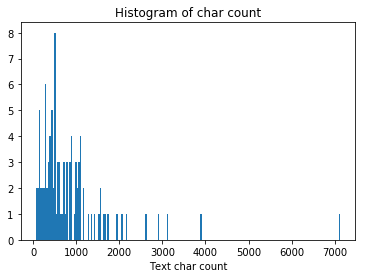

In [6]:
_ = plt.hist(train_df['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

##### 《2-2》新闻类别分布
接下来可以对数据集的类别进行分布统计，具体统计每类新闻的样本个数。分析结论如下：
    （1）在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
    （2）从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

Text(0.5,0,'category')

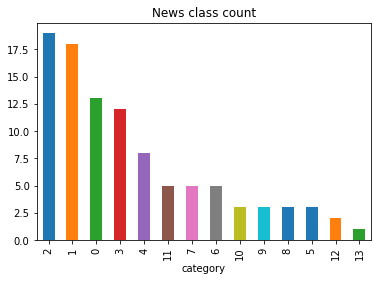

In [7]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

##### 《2-3》字符分布统计
分析思路及分析结论如下：
  （1）接下来可以统计每个字符出现的次数，首先可以将训练集中所有的句子进行拼接进而划分为字符，并统计每个字符的个数。
     从统计结果中可以看出，在训练集中总共包括2405个字，其中编号3750的字出现的次数最多，编号5043的字出现的次数最少。
     
  （2）这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

 
参考：
    注释---sorted的使用方法 https://blog.csdn.net/tangtanghao511/article/details/47810729
    sorted(iterable,key,reverse)，sorted一共有iterable,key,reverse这三个参数。
     其中iterable表示可以迭代的对象，例如可以是dict.items()、dict.keys()等，key是一个函数，用来选取参与比较的元素，reverse则是用来指定排序是倒序还是顺序，reverse=true则是倒序，reverse=false时则是顺序，默认时reverse=false。
    注释---dicts字典items()用法 https://blog.csdn.net/zyx_ly/article/details/88227562
  

In [8]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))
print(word_count[0])
print(word_count[-1])

2405
('3750', 3702)
('5034', 1)


In [9]:
from collections import Counter
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])
print(word_count[1])
print(word_count[2])

('900', 99)
('3750', 99)
('648', 96)


#### 数据分析的结论
通过上述分析我们可以得出以下结论：
   《1》赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
   《2》赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
   《3》赛题总共包括7000-8000个字符；
   
通过数据分析，我们还可以得出以下结论：
   《1》每个新闻平均字符个数较多，可能需要截断；
   《2》由于类别不均衡，会严重影响模型的精度；

#### 本章小结
本章对赛题数据进行读取，对新闻句子长度、类别和字符进行了可视化分析。

#### 本章作业
   《1》假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？
   《2》统计每类新闻中出现次数对多的字符

In [15]:
## 《1》假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？
##  多个字符分割字符串 参考链接 https://blog.csdn.net/shengyingpo/article/details/70313406
import re
train_df['text_len'] = train_df['text'].apply(lambda x: len(re.split('900|648|3750',x)))
print(train_df['text_len'].describe())

count    100.000000
mean      80.500000
std      107.926509
min        2.000000
25%       28.750000
50%       50.500000
75%       94.000000
max      895.000000
Name: text_len, dtype: float64


In [13]:
## 《2》统计每类新闻中出现次数对多的字符
from collections import Counter
def get_first1(x): 
    all_lines = ' '.join(list(x['text']))
    word_count = Counter(all_lines.split(" "))
    word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)
    return(word_count[0])
    
df=train_df.groupby(['label']).apply(get_first1)
print(df)  


label
0     (3750, 610)
1     (3750, 531)
2     (3750, 956)
3     (3750, 239)
4      (3750, 78)
5     (3750, 193)
6     (3750, 491)
7     (3750, 214)
8      (3750, 68)
9      (3750, 51)
10    (3750, 152)
11    (3750, 102)
12     (4464, 59)
13       (648, 6)
dtype: object
